## Figure 7

In [1]:
##loading libraries and functions:
source("../utils.R")

In [2]:
path_to_results <- "/Users/klagattu/Documents/GitHub/TiRP/results"

In [4]:
res = readRDS(paste(path_to_results, "PCA/pca_GT2017_bysortedsample.rds", sep="/"))

In [5]:
project = data.frame(res$x)
project$cell_type = sapply(rownames(project), function(x) strsplit(x, " ")[[1]][2])
project$donor = sapply(rownames(project), function(x) strsplit(x, " ")[[1]][1])
project$mem_type = ifelse(project$cell_type=="naive", "naive", "mem")

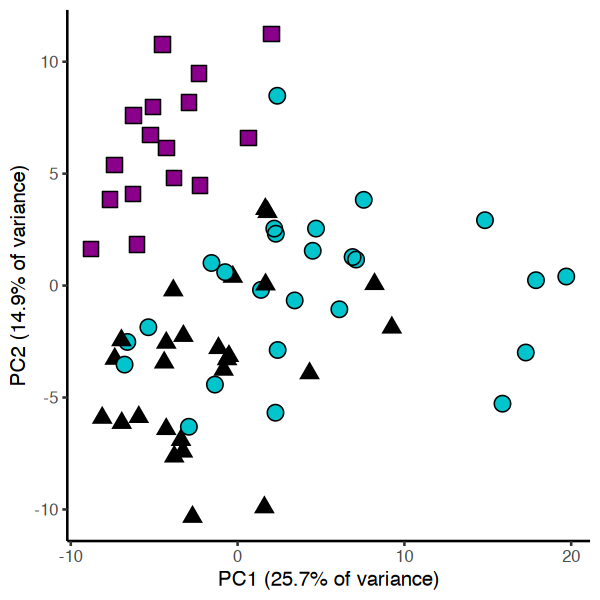

In [45]:
options(repr.plot.width=5, repr.plot.height=5)
g = ggplot()
g = g + theme_classic(base_size=12) + geom_point(aes(project$PC1, project$PC2, color=project$cell_type, shape = project$cell_type), size=4, show.legend=FALSE) + scale_color_manual(values=c("black", "turquoise3", "darkmagenta")) + scale_shape_manual(values=c(17,16,15)) 
g = g + geom_point(aes(project$PC1[project$cell_type=="Treg"], project$PC2[project$cell_type=="Treg"]), size=4, color="black", pch=0, show.legend=FALSE)
g = g + geom_point(aes(project$PC1[project$cell_type=="naive"], project$PC2[project$cell_type=="naive"]), size=4, color="black", pch=1, show.legend=FALSE)
g + xlab("PC1 (25.7% of variance)") + ylab("PC2 (14.9% of variance)")

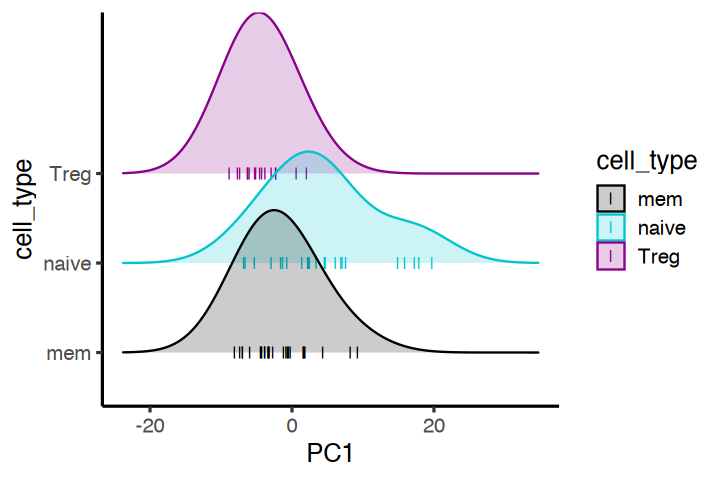

In [10]:
library(ggridges)
options(repr.plot.width=6, repr.plot.height=4)
ggplot(project, aes(x = PC1, y = cell_type, color=cell_type, fill=cell_type)) + geom_density_ridges(bandwidth=5, jittered_points = TRUE, position = position_points_jitter(width = 0.05, height = 0), point_shape = '|', point_size = 3, point_alpha = 1, alpha = 0.2) + scale_fill_manual(values=c("black", "turquoise3", "darkmagenta"))+ scale_color_manual(values=c("black", "turquoise3", "darkmagenta")) + theme_classic(base_size=15)


In [12]:
drs = unique(project$donor[project$cell_type=="Treg"])
n_success = 0
for (i in 1:length(drs)){
  sub = project[project$donor==drs[i],]
  if (sub$cell_type[sub$PC1==max(sub$PC1)] == "naive"){
    n_success = n_success + 1
  }
}
n_success
length(drs)

[1] 15

[1] 16

In [15]:
binom.test(n_success, length(drs))$p.value

[1] 0.0005187988

In [23]:
library(factoextra)
var = get_pca_var(res)
contribs = data.frame(var$contrib[,1:2])
contribs$type = "%AAs p108-p112"
contribs$type[grepl("vgene", rownames(contribs))] = "TRBV gene"
contribs$type[grepl("pos4", rownames(contribs))] = "p107"
contribs$type[grepl("pos.6", rownames(contribs))] = "p113"
contribs$type[grepl("Jseq", rownames(contribs))] = "Jmotif"
contribs$type[grepl("length", rownames(contribs))] = "length"
typecontribs = contribs %>% group_by(type) %>% dplyr::summarise(sum_P1 = sum(Dim.1), sum_P2 = sum(Dim.2))
contribplot = data.frame(xlab = c(paste(typecontribs$type, "PC1", sep="_"), paste(typecontribs$type, "PC2", sep="_")), val = c(typecontribs$sum_P1, typecontribs$sum_P2), type=rep(typecontribs$type, 2))
contribplot$xlab = as.character(contribplot$xlab)
contribplot$PC = sapply(contribplot$xlab, function(x) strsplit(x, "_")[[1]][2])

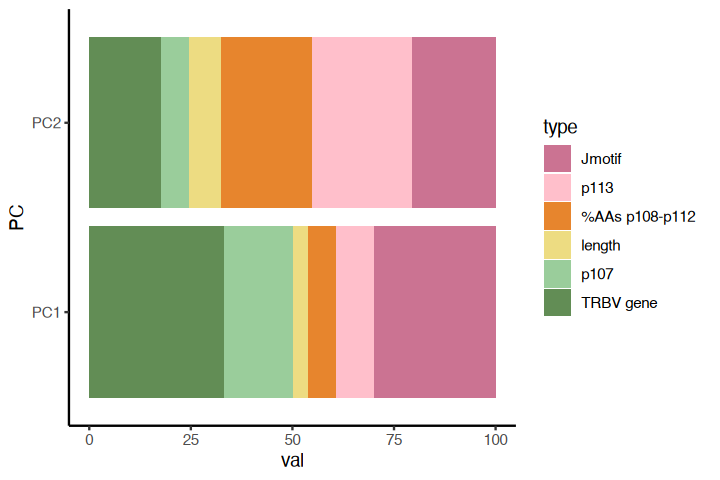

In [25]:
contribplot$type = factor(contribplot$type, levels=c("Jmotif", "p113", "%AAs p108-p112", "length", "p107", "TRBV gene"))
g = ggplot(contribplot, aes(PC, val, fill=type))
g + geom_bar(stat="identity", position="stack") + theme_classic() + coord_flip() + scale_fill_manual(values = c("#cb7392", "#ffbfcb","#e7852d", "#eddc82",  "#9acd9b", "#628d55"))


In [31]:
cos2data = data.frame(var$cos2[,1:10])
cos2data$type = "perc"
cos2data$type[grepl("vgene", rownames(cos2data))] = "vgene"
cos2data$type[grepl("pos4", rownames(cos2data))] = "pos4"
cos2data$type[grepl("pos.6", rownames(cos2data))] = "pos.6"
cos2data$type[grepl("Jseq", rownames(cos2data))] = "Jseq"
cos2data$type[grepl("length", rownames(cos2data))] = "length"

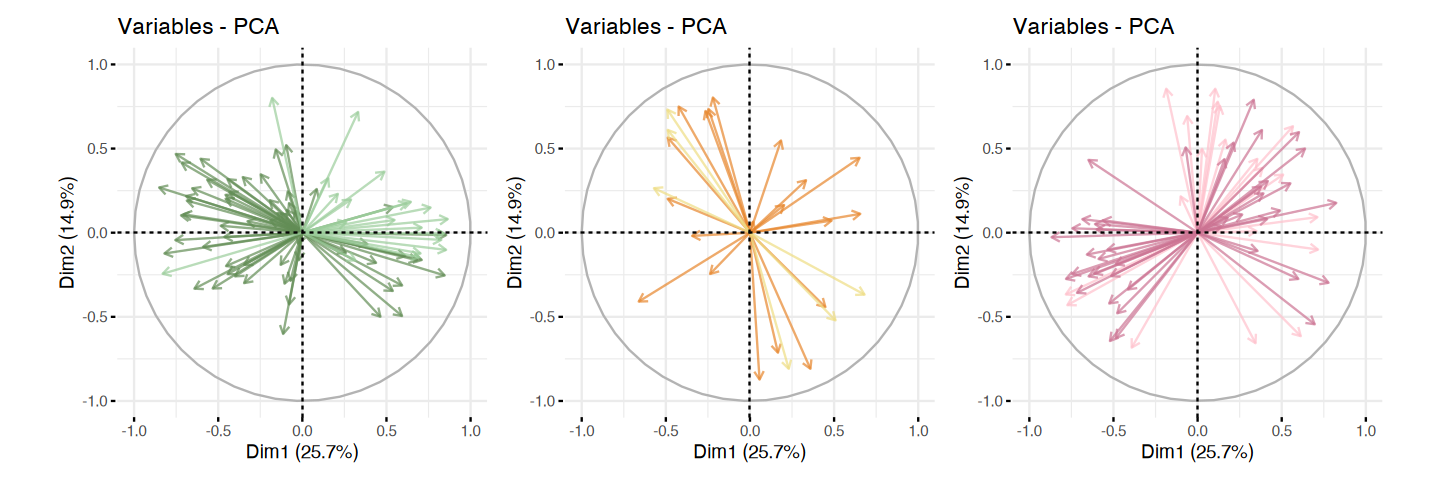

In [33]:
mrl = fviz_pca_var(res, select.var = list(name=rownames(cos2data)[grepl("perc", rownames(cos2data)) | grepl("length", rownames(cos2data))]), label="none", col.var = cos2data$type, palette = c("lightgoldenrod2", "#e7862b"), alpha.var=0.7) + theme(legend.position = "none")
vrl = fviz_pca_var(res, select.var = list(name=rownames(cos2data)[grepl("vgene", rownames(cos2data)) | grepl("pos4", rownames(cos2data))]), label="none", col.var = cos2data$type, palette = c("darkseagreen3", "#628d55"), alpha.var=0.7) + theme(legend.position = "none")
jrl = fviz_pca_var(res, select.var = list(name=rownames(cos2data)[grepl("Jseq", rownames(cos2data)) | grepl("pos.6", rownames(cos2data))]), label="none", col.var = cos2data$type, palette = c("#cb7392", "pink"), alpha.var=0.7) + theme(legend.position = "none")
options(repr.plot.height=4, repr.plot.width=12)
vrl + mrl + jrl

In [34]:
batchscores = readRDS(paste(path_to_results, "TiRP_scoring/GT2017_scored_bybatch_byregion.rds", sep="/"))
project$batch = as.character(rownames(project))
project$batch = sapply(project$batch, function(x) gsub("mem", "Tmemory", x))
project$batch = sapply(project$batch, function(x) gsub("naive", "Tnaive", x))

In [35]:
project = left_join(project, batchscores, by="batch")

In [36]:
project$mean_vr_scaled = (project$mean_vreg - 0.03846178)/0.2364265
project$mean_mr_scaled = (project$mean_mr - (-0.1459054))/0.2364265

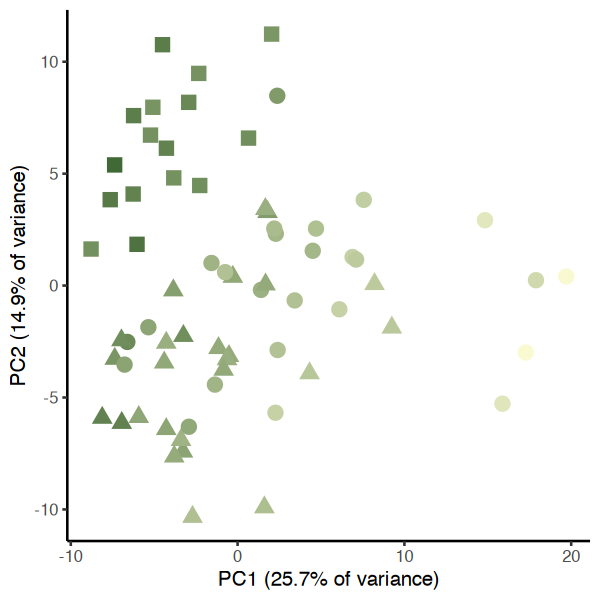

In [39]:
options(repr.plot.height=5, repr.plot.width=5)
g = ggplot(project, aes(PC1, PC2, color=mean_vr_scaled, shape=cell_type))
g = g + theme_classic(base_size=12) + geom_point(size=4, show.legend=FALSE) + scale_color_gradient(low="lightgoldenrodyellow", high="#416935")
g + xlab("PC1 (25.7% of variance)") + ylab("PC2 (14.9% of variance)") + scale_shape_manual(values=c(17, 16, 15))


In [42]:
cor.test(project$PC1, project$mean_vr_scaled)


	Pearson's product-moment correlation

data:  project$PC1 and project$mean_vr_scaled
t = -13.318, df = 65, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.9088972 -0.7743713
sample estimates:
      cor 
-0.855456 


In [43]:
cor.test(project$PC1, project$mean_vr_scaled)$p.value

[1] 3.047321e-20

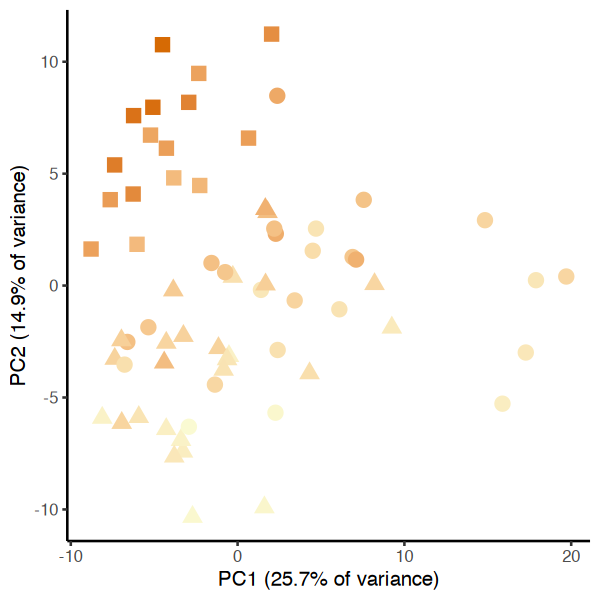

In [40]:
g = ggplot(project, aes(PC1, PC2, color=mean_mr_scaled, shape=cell_type))
g = g + theme_classic(base_size=12) + geom_point(size=4, show.legend=FALSE) + scale_color_gradient(low="lightgoldenrodyellow", high="#d66a04")
g + xlab("PC1 (25.7% of variance)") + ylab("PC2 (14.9% of variance)") + scale_shape_manual(values=c(17, 16, 15))


In [44]:
cor.test(project$PC2, project$mean_mr_scaled)
cor.test(project$PC2, project$mean_mr_scaled)$p.value


	Pearson's product-moment correlation

data:  project$PC2 and project$mean_mr_scaled
t = 13.173, df = 65, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.7706023 0.9072579
sample estimates:
      cor 
0.8529292 


[1] 5.134853e-20